In [1]:
# Librerie necessarie
import os
import cv2
import pandas as pd
from pathlib import Path
from ultralytics import YOLO
import matplotlib.pyplot as plt
from IPython.display import display

# === CONFIG ===
DATASET_INPUT_DIR = 'Images_prova'
DATASET_OUTPUT_DIR = 'Images_prova'
MODEL_PATH = 'yolov8n.pt'  # o un modello custom addestrato

In [2]:
# === CARICAMENTO MODELLO ===
model = YOLO(MODEL_PATH)

# === INIZIALIZZAZIONE DEL DATAFRAME ===
dataset_df = pd.DataFrame(columns=['nome_immagine', 'classe', 'accuratezza', 'info_immagine'])

In [3]:
# === FUNZIONE PER ESEGUIRE DETECTION ===
def rileva_classi(image_path):
    results = model(image_path)
    predictions = results[0]

    if len(predictions.boxes) == 0:
        return None, None, {}

    classe_id = int(predictions.boxes.cls[0].item())
    confidenza = float(predictions.boxes.conf[0].item())
    classe_nome = model.names[classe_id]

    # Esempio di info (da sostituire in base alla classe)
    info_extra = {}
    if classe_nome.lower() == 'macchina':
        info_extra = {'modello': 'Fiat Panda', 'targa': 'AB123CD', 'costo': '€9000'}

    return classe_nome, confidenza, info_extra


In [4]:
# === CICLO SU TUTTE LE IMMAGINI ===
for file_name in os.listdir(DATASET_INPUT_DIR):
    if not file_name.lower().endswith(('.png', '.jpg', '.jpeg')):
        continue

    image_path = os.path.join(DATASET_INPUT_DIR, file_name)
    classe, conf, info = rileva_classi(image_path)

    # Aggiunta al DataFrame
    dataset_df.loc[len(dataset_df)] = {
        'nome_immagine': file_name,
        'classe': classe if classe else 'non rilevata',
        'accuratezza': conf if conf else 0,
        'info_immagine': info
    }


image 1/1 C:\Users\andre\Desktop\CHATBOT_RASA\test\Images_prova\img1.png: 608x640 (no detections), 1179.4ms
Speed: 41.8ms preprocess, 1179.4ms inference, 23.5ms postprocess per image at shape (1, 3, 608, 640)

image 1/1 C:\Users\andre\Desktop\CHATBOT_RASA\test\Images_prova\img10.jpg: 640x640 1 car, 1390.9ms
Speed: 41.2ms preprocess, 1390.9ms inference, 106.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 C:\Users\andre\Desktop\CHATBOT_RASA\test\Images_prova\img11.jpg: 352x640 1 car, 724.5ms
Speed: 17.7ms preprocess, 724.5ms inference, 9.8ms postprocess per image at shape (1, 3, 352, 640)

image 1/1 C:\Users\andre\Desktop\CHATBOT_RASA\test\Images_prova\img12.jpg: 416x640 1 car, 837.8ms
Speed: 31.9ms preprocess, 837.8ms inference, 9.4ms postprocess per image at shape (1, 3, 416, 640)

image 1/1 C:\Users\andre\Desktop\CHATBOT_RASA\test\Images_prova\img13.jpg: 448x640 1 car, 819.0ms
Speed: 16.9ms preprocess, 819.0ms inference, 9.5ms postprocess per image at shape (1, 3, 448,

In [5]:
def mostra_info_immagini(df, img_dir=DATASET_INPUT_DIR):
    for idx, row in df.iterrows():
        nome = row['nome_immagine']
        classe = row['classe']
        acc = row['accuratezza']
        info = row['info_immagine']

        image_path = os.path.join(img_dir, nome)
        
        if not os.path.exists(image_path):
            print(f"Immagine non trovata: {nome}")
            continue

        # Carica e mostra immagine
        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        print(f"\nImmagine: {nome}")
        print(f"Classe: {classe}")
        print(f"Accuratezza: {acc:.2%}")
        print(f"Info: {info}")

        plt.imshow(img)
        plt.title(f"{nome} - {classe} ({acc:.2%})")
        plt.axis('off')
        plt.show()



Immagine: img1.png
Classe: non rilevata
Accuratezza: 0.00%
Info: {}


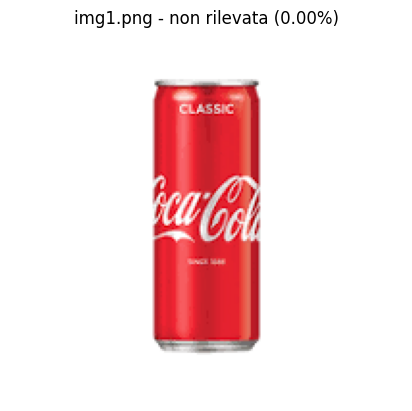


Immagine: img10.jpg
Classe: car
Accuratezza: 42.18%
Info: {}


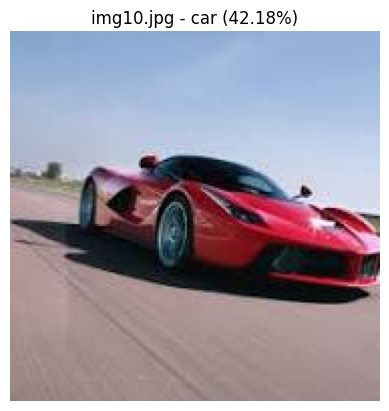


Immagine: img11.jpg
Classe: car
Accuratezza: 91.35%
Info: {}


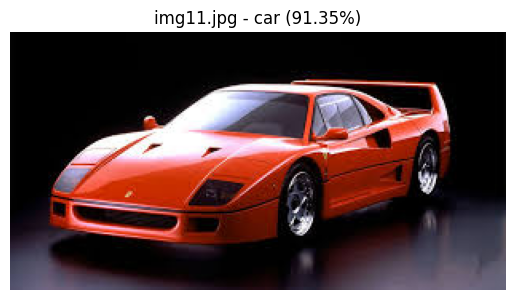


Immagine: img12.jpg
Classe: car
Accuratezza: 89.83%
Info: {}


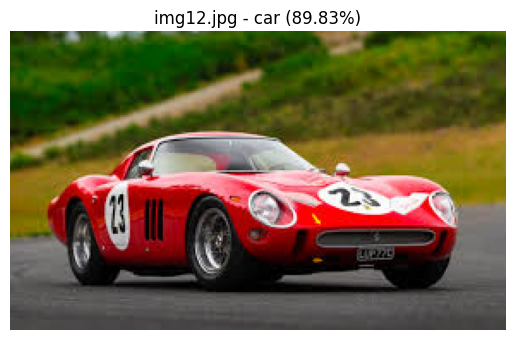


Immagine: img13.jpg
Classe: car
Accuratezza: 87.57%
Info: {}


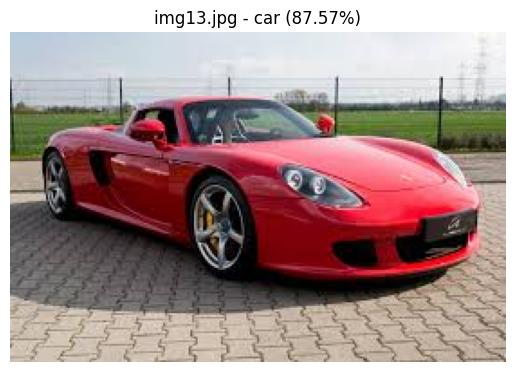


Immagine: img14.jpg
Classe: car
Accuratezza: 89.31%
Info: {}


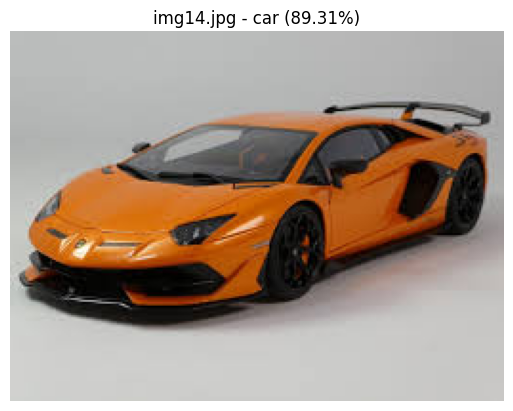


Immagine: img15.jpg
Classe: car
Accuratezza: 88.86%
Info: {}


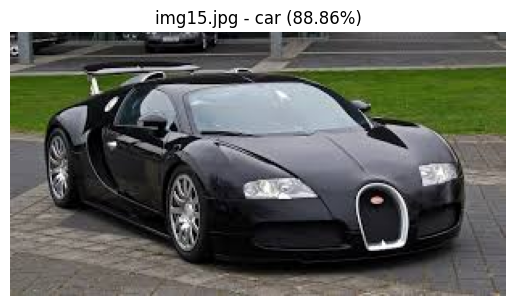


Immagine: img2.jpg
Classe: truck
Accuratezza: 81.91%
Info: {}


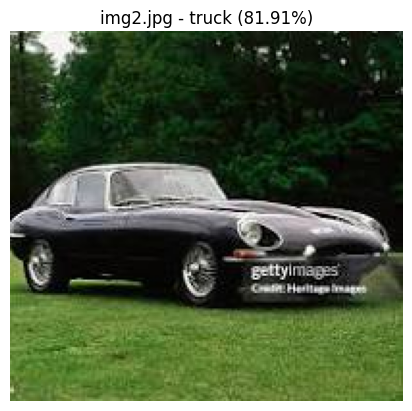


Immagine: img3.jpg
Classe: cell phone
Accuratezza: 63.44%
Info: {}


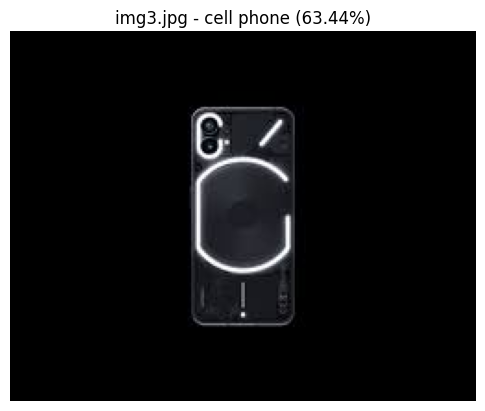


Immagine: img4.jpg
Classe: dog
Accuratezza: 60.06%
Info: {}


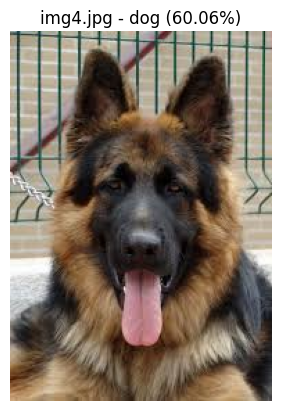


Immagine: img5.jpg
Classe: refrigerator
Accuratezza: 37.60%
Info: {}


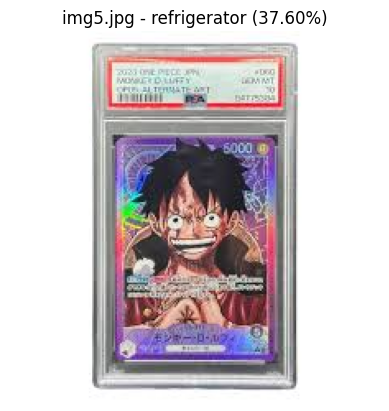


Immagine: img6.jpg
Classe: non rilevata
Accuratezza: 0.00%
Info: {}


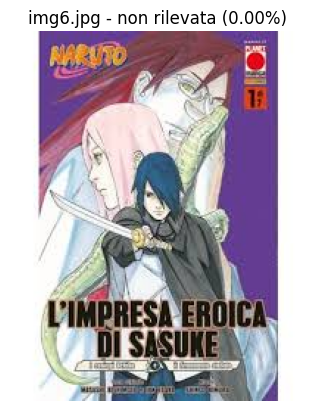


Immagine: img7.jpg
Classe: airplane
Accuratezza: 65.54%
Info: {}


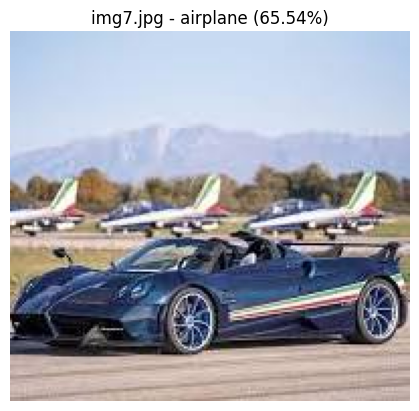


Immagine: img8.jpg
Classe: car
Accuratezza: 86.30%
Info: {}


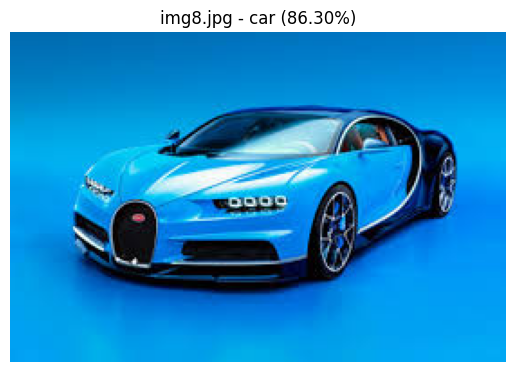


Immagine: img9.jpg
Classe: car
Accuratezza: 80.85%
Info: {}


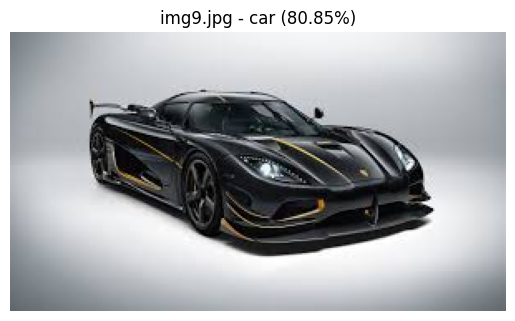

In [6]:
mostra_info_immagini(dataset_df)

In [7]:
def aggiorna_immagine_manual(nome_immagine, classe="", accuratezza="", info="", df=None):
    if df is None:
        print("Devi fornire il DataFrame.")
        return

    # Trova la riga corrispondente
    row_index = df[df['nome_immagine'] == nome_immagine].index
    if len(row_index) == 0:
        print(f"Immagine '{nome_immagine}' non trovata nel DataFrame.")
        return

    idx = row_index[0]

    # Aggiornamento condizionato
    if classe.strip():
        df.at[idx, 'classe'] = classe

    if accuratezza.strip():
        try:
            df.at[idx, 'accuratezza'] = float(accuratezza)
        except ValueError:
            print("Valore di accuratezza non valido, ignorato.")

    if info.strip():
        df.at[idx, 'info_immagine'] = {"descrizione": info}

    print(f"'{nome_immagine}' aggiornato con classe='{classe}', accuratezza='{accuratezza}', info='{info}'")


In [12]:
aggiorna_immagine_manual("img5.jpg", "colletion cards", " ", "One piece",dataset_df)
aggiorna_immagine_manual("img1.png", "can", " ", "Coca Cola",dataset_df)
aggiorna_immagine_manual("img2.jpg", "car", "", "Jaguar Itype",dataset_df)
aggiorna_immagine_manual("img6.jpg", "book","", "Manga Naruto",dataset_df)
aggiorna_immagine_manual("img3.jpg", "car", "", "Jaguar Itype",dataset_df)
aggiorna_immagine_manual("img4.jpg", "cell phone"," ", "Nothing Phone",dataset_df)

'img5.jpg' aggiornato con classe='colletion cards', accuratezza=' ', info='One piece'
'img1.png' aggiornato con classe='can', accuratezza=' ', info='Coca Cola'
'img2.jpg' aggiornato con classe='car', accuratezza='', info='Jaguar Itype'
'img6.jpg' aggiornato con classe='book', accuratezza='', info='Manga Naruto'
'img3.jpg' aggiornato con classe='car', accuratezza='', info='Jaguar Itype'
'img4.jpg' aggiornato con classe='cell phone', accuratezza=' ', info='Nothing Phone'


In [13]:
dataset_df

nome_immagine           classe  accuratezza  \
0       img1.png              can     0.000000   
1      img10.jpg              car     0.421793   
2      img11.jpg              car     0.913471   
3      img12.jpg              car     0.898256   
4      img13.jpg              car     0.875689   
5      img14.jpg              car     0.893136   
6      img15.jpg              car     0.888551   
7       img2.jpg              car     0.819086   
8       img3.jpg              car     0.634403   
9       img4.jpg       cell phone     0.600559   
10      img5.jpg  colletion cards     0.375989   
11      img6.jpg             book     0.000000   
12      img7.jpg         airplane     0.655406   
13      img8.jpg              car     0.862968   
14      img9.jpg              car     0.808512   

                       info_immagine  
0       {'descrizione': 'Coca Cola'}  
1                                 {}  
2                                 {}  
3                                 {}  
4                                 {}  
5                                 {}  
6                                 {}  
7    {'descrizione': 'Jaguar Itype'}  
8    {'descrizione': 'Jaguar Itype'}  
9   {'descrizione': 'Nothing Phone'}  
10      {'descrizione': 'One piece'}  
11   {'descrizione': 'Manga Naruto'}  
12                                {}  
13                                {}  
14                                {}

In [14]:
aggiorna_immagine_manual("img7.jpg","","", "Pagani Italia",dataset_df)
aggiorna_immagine_manual("img8.png","","", "Bugatti Chiron",dataset_df)
aggiorna_immagine_manual("img9.jpg","","", "Koenigsegg agera  rs",dataset_df)
aggiorna_immagine_manual("img10.jpg","","", "Ferrari LaFerrari",dataset_df)
aggiorna_immagine_manual("img11.jpg","","", "Ferrari f40",dataset_df)
aggiorna_immagine_manual("img12.jpg","","", "Ferrari 250 gto",dataset_df)
aggiorna_immagine_manual("img13.jpg","","", "Porshe carrera gt",dataset_df)
aggiorna_immagine_manual("img14.jpg","","", "Lamborghini aventor svj",dataset_df)
aggiorna_immagine_manual("img15.jpg","","", "Bugatti veyron",dataset_df)

'img7.jpg' aggiornato con classe='', accuratezza='', info='Pagani Italia'
Immagine 'img8.png' non trovata nel DataFrame.
'img9.jpg' aggiornato con classe='', accuratezza='', info='Koenigsegg agera  rs'
'img10.jpg' aggiornato con classe='', accuratezza='', info='Ferrari LaFerrari'
'img11.jpg' aggiornato con classe='', accuratezza='', info='Ferrari f40'
'img12.jpg' aggiornato con classe='', accuratezza='', info='Ferrari 250 gto'
'img13.jpg' aggiornato con classe='', accuratezza='', info='Porshe carrera gt'
'img14.jpg' aggiornato con classe='', accuratezza='', info='Lamborghini aventor svj'
'img15.jpg' aggiornato con classe='', accuratezza='', info='Bugatti veyron'



Immagine: img1.png
Classe: can
Accuratezza: 0.00%
Info: {'descrizione': 'Coca Cola'}


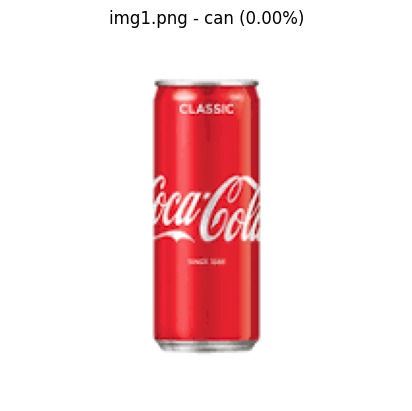


Immagine: img10.jpg
Classe: car
Accuratezza: 42.18%
Info: {'descrizione': 'Ferrari LaFerrari'}


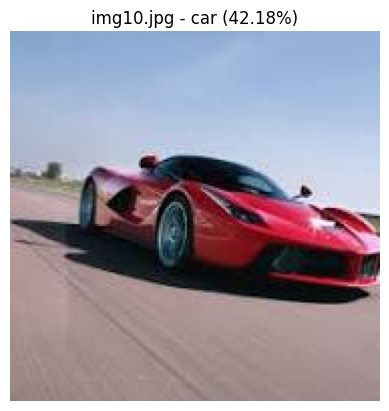


Immagine: img11.jpg
Classe: car
Accuratezza: 91.35%
Info: {'descrizione': 'Ferrari f40'}


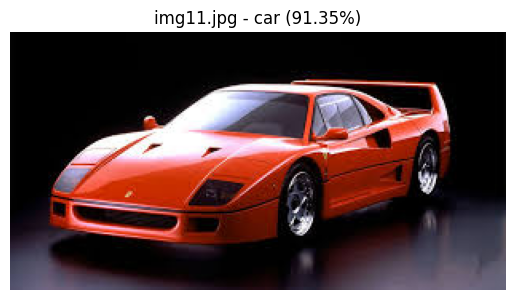


Immagine: img12.jpg
Classe: car
Accuratezza: 89.83%
Info: {'descrizione': 'Ferrari 250 gto'}


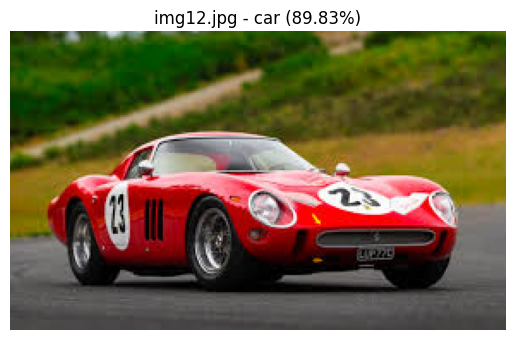


Immagine: img13.jpg
Classe: car
Accuratezza: 87.57%
Info: {'descrizione': 'Porshe carrera gt'}


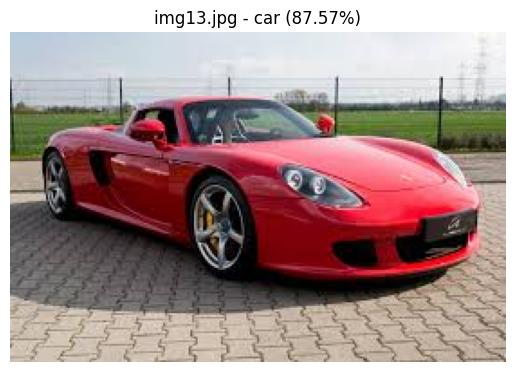


Immagine: img14.jpg
Classe: car
Accuratezza: 89.31%
Info: {'descrizione': 'Lamborghini aventor svj'}


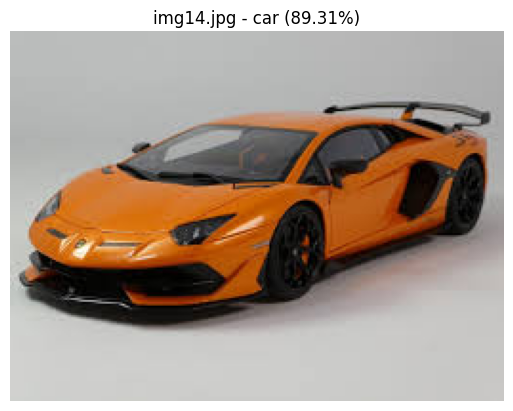


Immagine: img15.jpg
Classe: car
Accuratezza: 88.86%
Info: {'descrizione': 'Bugatti veyron'}


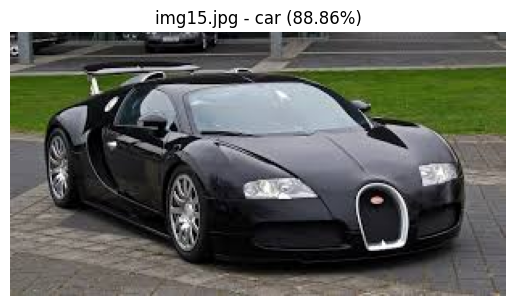


Immagine: img2.jpg
Classe: car
Accuratezza: 81.91%
Info: {'descrizione': 'Jaguar Itype'}


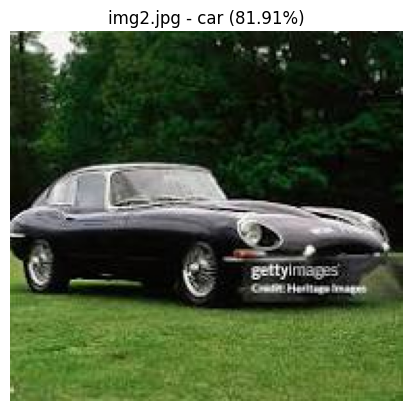


Immagine: img3.jpg
Classe: car
Accuratezza: 63.44%
Info: {'descrizione': 'Jaguar Itype'}


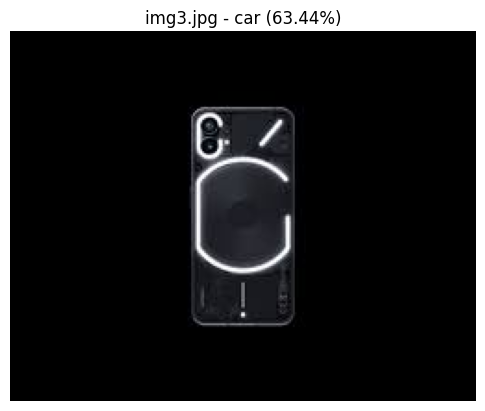


Immagine: img4.jpg
Classe: cell phone
Accuratezza: 60.06%
Info: {'descrizione': 'Nothing Phone'}


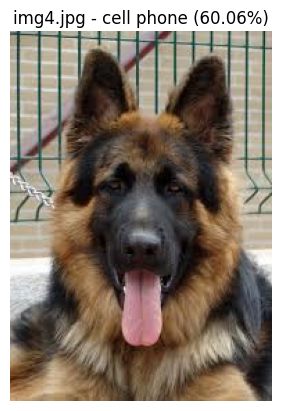


Immagine: img5.jpg
Classe: colletion cards
Accuratezza: 37.60%
Info: {'descrizione': 'One piece'}


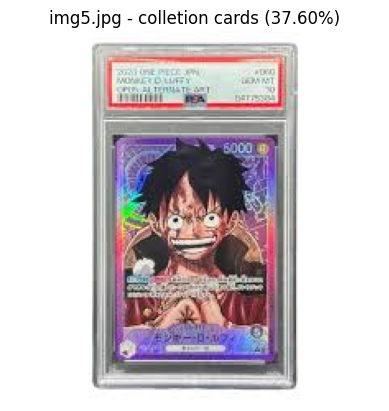


Immagine: img6.jpg
Classe: book
Accuratezza: 0.00%
Info: {'descrizione': 'Manga Naruto'}


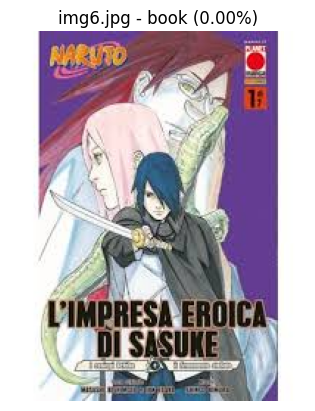


Immagine: img7.jpg
Classe: airplane
Accuratezza: 65.54%
Info: {'descrizione': 'Pagani Italia'}


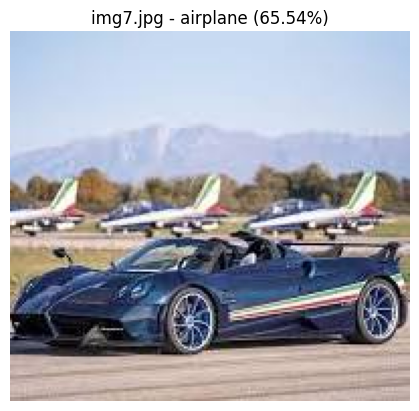


Immagine: img8.jpg
Classe: car
Accuratezza: 86.30%
Info: {}


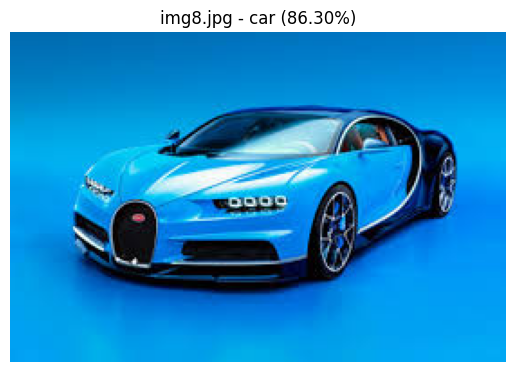


Immagine: img9.jpg
Classe: car
Accuratezza: 80.85%
Info: {'descrizione': 'Koenigsegg agera  rs'}


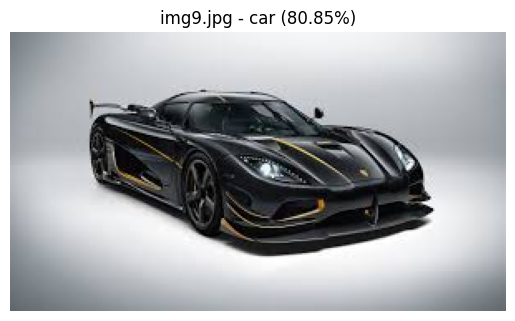

In [15]:
mostra_info_immagini(dataset_df)

In [17]:
def catalogare_oggetti(dataset_df, path_output='collezioni'):
    # Crea la cartella se non esiste
    os.makedirs(path_output, exist_ok=True)

    # Per ogni classe nel dataset
    classi_uniche = dataset_df['classe'].unique()
    for classe in classi_uniche:
        subset = dataset_df[dataset_df['classe'] == classe]
        subset.to_csv(os.path.join(path_output, f"{classe}_dataset.csv"), index=False)
        print(f"Creato dataset per la classe '{classe}' con {len(subset)} oggetti.")

    print("Catalogazione completata.")

In [18]:
catalogare_oggetti(dataset_df)

Creato dataset per la classe 'can' con 1 oggetti.
Creato dataset per la classe 'car' con 10 oggetti.
Creato dataset per la classe 'cell phone' con 1 oggetti.
Creato dataset per la classe 'colletion cards' con 1 oggetti.
Creato dataset per la classe 'book' con 1 oggetti.
Creato dataset per la classe 'airplane' con 1 oggetti.
Catalogazione completata.
